# Rainfall Prediction System for Indian Agriculture

## Overview
This notebook performs comprehensive analysis of rainfall data to build predictive models for agricultural planning.

## Workflow
1. Data Loading and Validation
2. Missing Data Detection and Visualization
3. Data Imputation and Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering and Scaling
6. Train-Test Split
7. Multiple Classifier Training
8. Model Evaluation and Selection
9. Model Serialization

## 1. Import Required Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score

# Model persistence
import pickle

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## 2. Data Loading and Validation

In [2]:
# Load dataset
try:
    df = pd.read_csv('data/WeatherAUS.csv')
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure 'WeatherAUS.csv' is in the data/ folder.")
    raise

Dataset loaded successfully!
Shape: (145460, 23)


In [3]:
# Display first few rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Statistical summary
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
# Check column names
print("Columns in dataset:")
print(df.columns.tolist())

Columns in dataset:
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


## 3. Missing Data Detection and Visualization

In [7]:
# Calculate missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_count.values,
    'Missing_Percentage': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("Missing Data Summary:")
print(missing_df)

Missing Data Summary:
           Column  Missing_Count  Missing_Percentage
6        Sunshine          69835           48.009762
5     Evaporation          62790           43.166506
18       Cloud3pm          59358           40.807095
17       Cloud9am          55888           38.421559
15    Pressure9am          15065           10.356799
16    Pressure3pm          15028           10.331363
9      WindDir9am          10566            7.263853
7     WindGustDir          10326            7.098859
8   WindGustSpeed          10263            7.055548
14    Humidity3pm           4507            3.098446
10     WindDir3pm           4228            2.906641
20        Temp3pm           3609            2.481094
4        Rainfall           3261            2.241853
21      RainToday           3261            2.241853
22   RainTomorrow           3253            2.236354
12   WindSpeed3pm           3062            2.105046
13    Humidity9am           2654            1.824557
19        Temp9am       

<Figure size 1200x600 with 0 Axes>

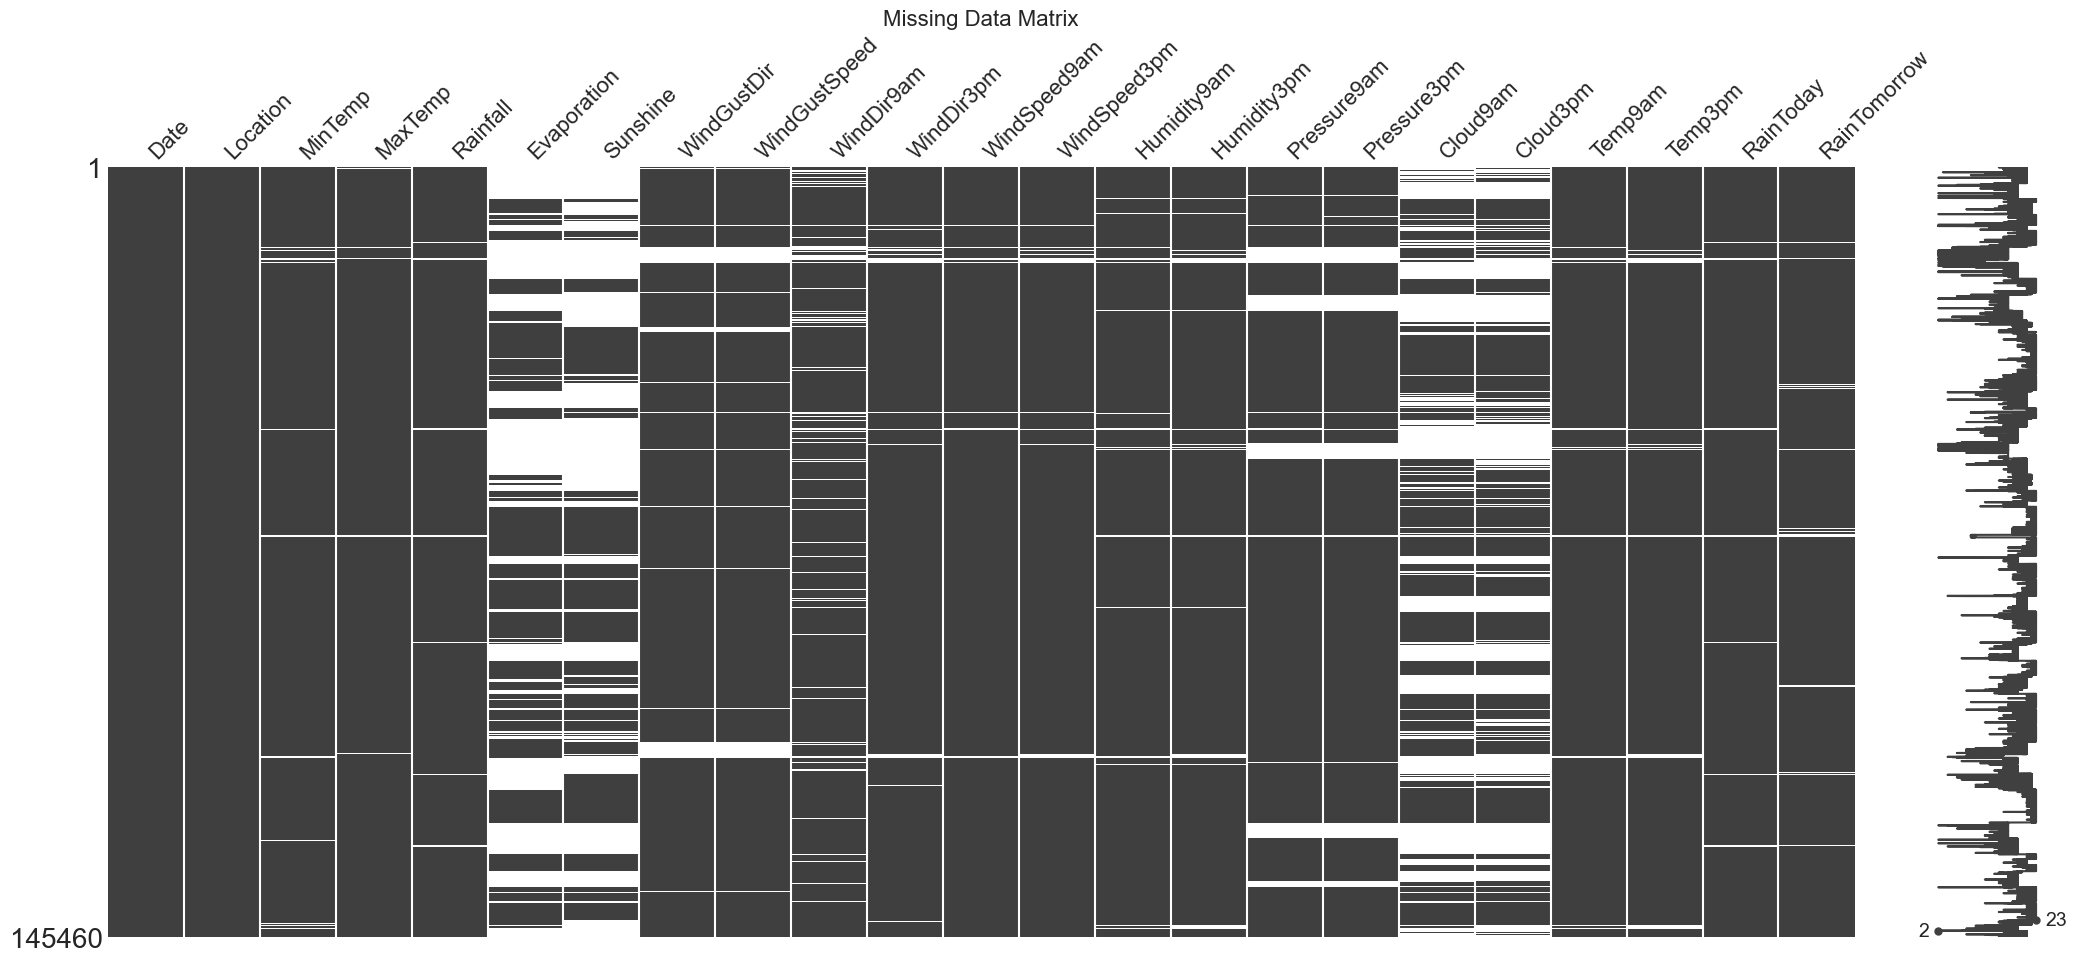

In [8]:
# Visualize missing data patterns
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Missing Data Matrix', fontsize=16)
plt.savefig('missing_data_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Data Preprocessing and Imputation

In [9]:
# Drop Date column as it's not needed for prediction
df = df.drop('Date', axis=1)

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numerical columns: 16
Categorical columns: 6


In [10]:
# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Verify no null values remain
print(f"Null values after imputation: {df.isnull().sum().sum()}")

# Save imputer for production use
with open('imputer.pkl', 'wb') as f:
    pickle.dump({'numerical': num_imputer, 'categorical': cat_imputer}, f)
print("Imputer saved to imputer.pkl")

Null values after imputation: 0
Imputer saved to imputer.pkl


## 5. Exploratory Data Analysis (EDA)

In [11]:
# Encode categorical variables for correlation analysis
df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

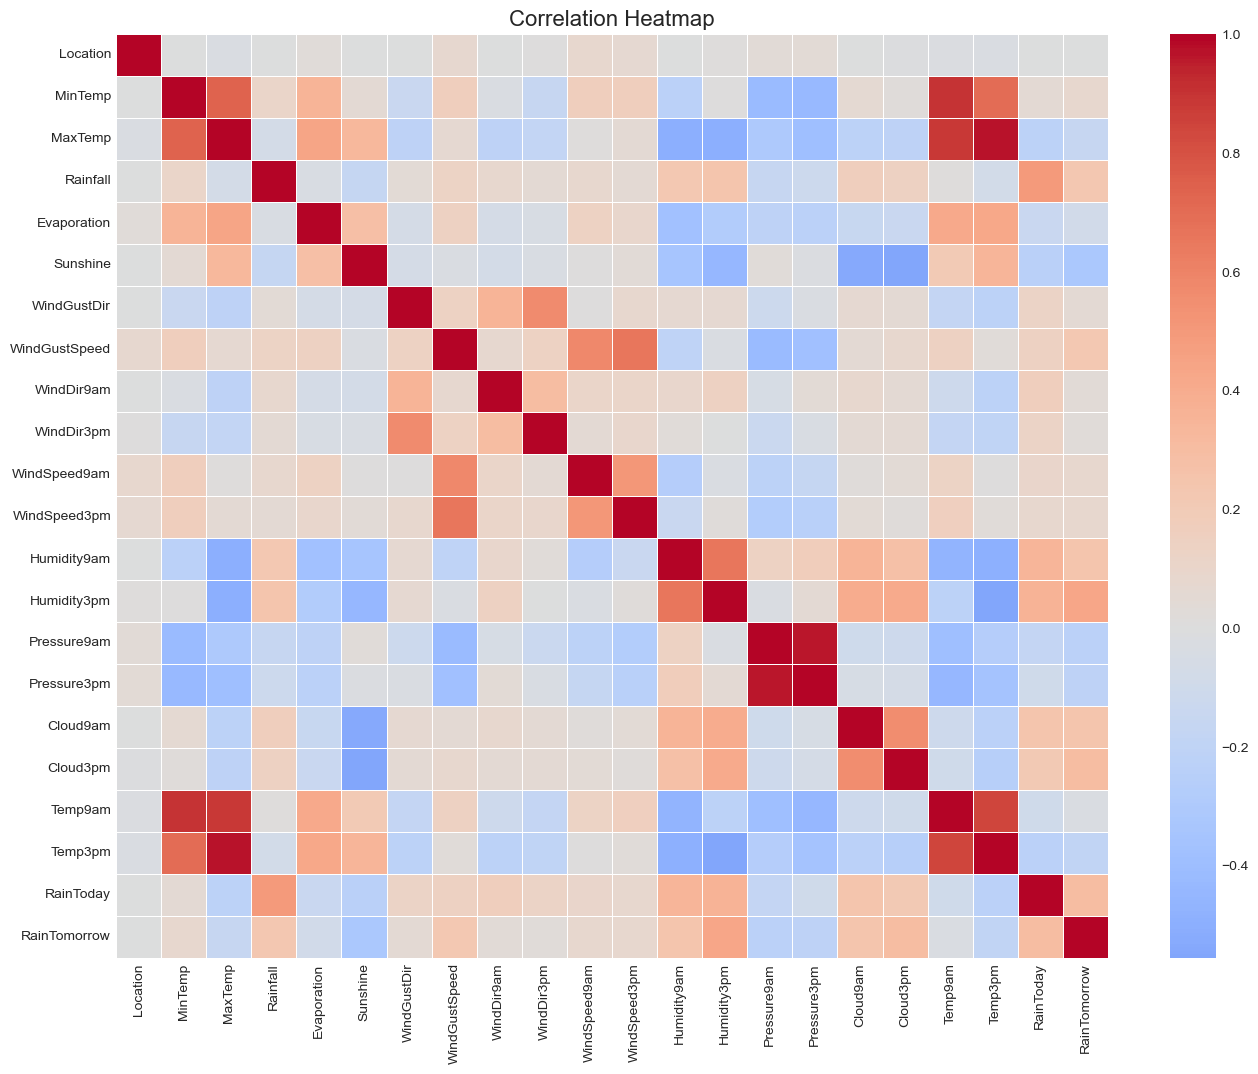

In [12]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

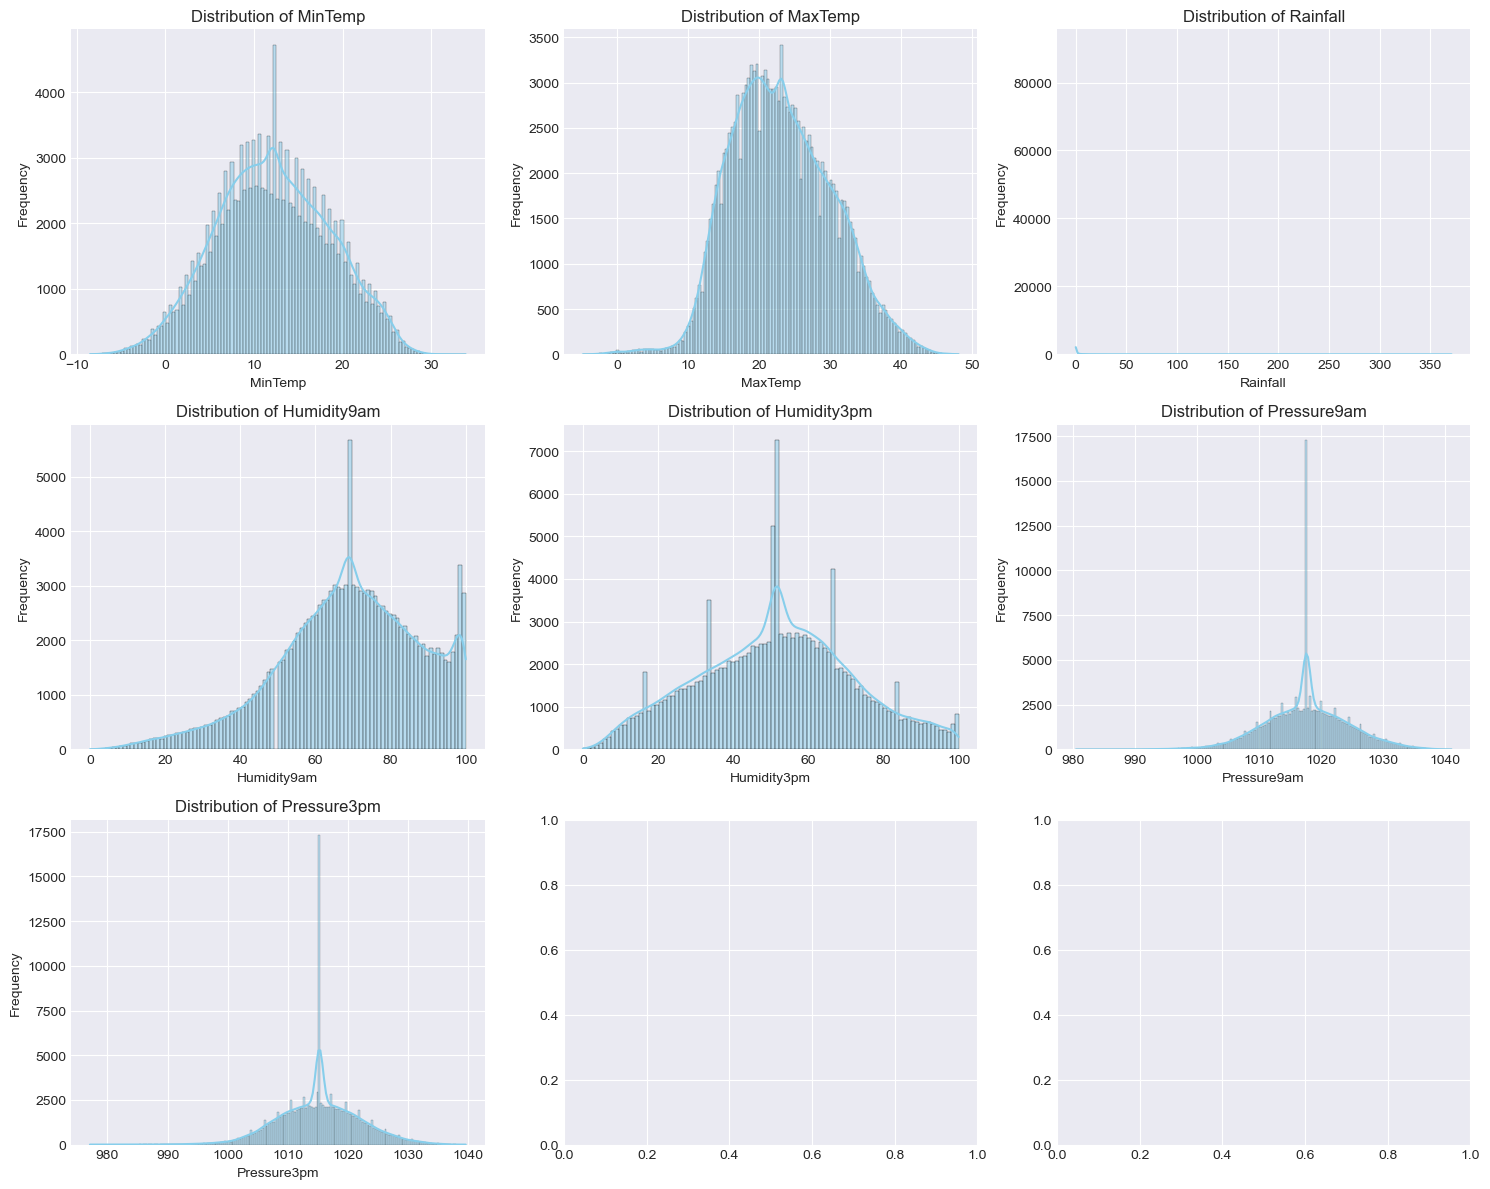

In [13]:
# Distribution plots for key numerical features
key_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    if col in df.columns:
        sns.histplot(df[col], kde=True, ax=axes[idx], color='skyblue')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('distribution_plots.png', dpi=300, bbox_inches='tight')
plt.show()

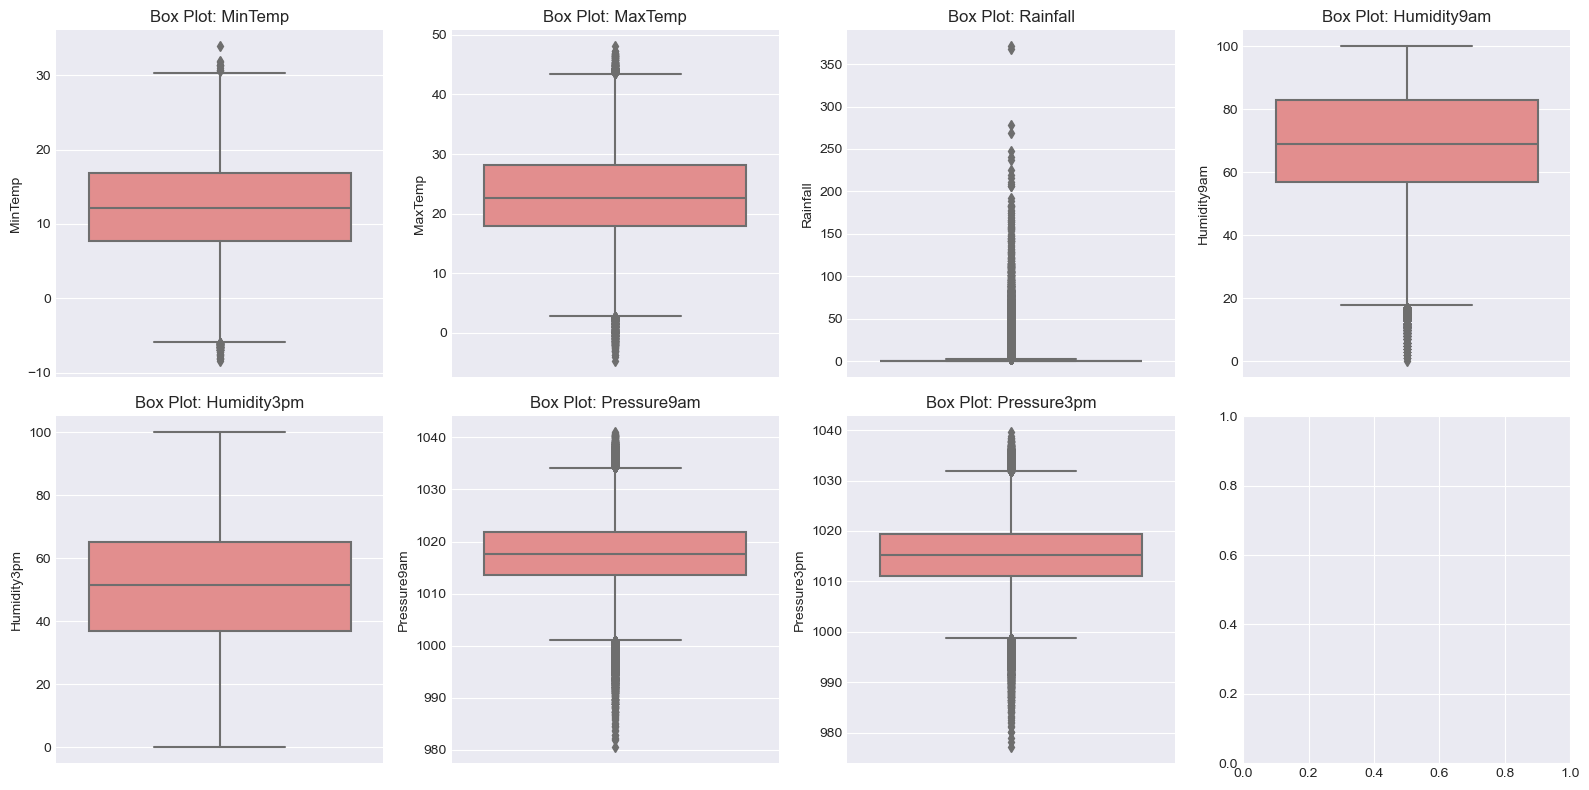

In [14]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    if col in df.columns and idx < 8:
        sns.boxplot(y=df[col], ax=axes[idx], color='lightcoral')
        axes[idx].set_title(f'Box Plot: {col}')
        axes[idx].set_ylabel(col)

plt.tight_layout()
plt.savefig('boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Feature Engineering and Dataset Splitting

In [15]:
# Separate features and target
# Assuming 'RainTomorrow' is the target variable
target_col = 'RainTomorrow'

if target_col not in df.columns:
    print(f"Warning: '{target_col}' not found. Available columns: {df.columns.tolist()}")
    # Use RainToday as fallback if RainTomorrow doesn't exist
    target_col = 'RainToday' if 'RainToday' in df.columns else df.columns[-1]
    print(f"Using '{target_col}' as target variable")

X = df.drop(target_col, axis=1)
y = df[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

Features shape: (145460, 21)
Target shape: (145460,)
Target distribution:
RainTomorrow
No     113849
Yes     31611
Name: count, dtype: int64


In [16]:
# Encode remaining categorical features in X
X_encoded = X.copy()
feature_encoders = {}

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    feature_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Save encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump({'features': feature_encoders, 'target': target_encoder}, f)
print("Encoders saved to encoder.pkl")

Encoders saved to encoder.pkl


In [17]:
# Feature scaling
feature_names = X_encoded.columns.tolist()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)

print(f"Scaled features - Mean: {X_scaled.mean().mean():.4f}, Std: {X_scaled.std().mean():.4f}")

# Save scaler
with open('scale.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved to scale.pkl")

Scaled features - Mean: -0.0000, Std: 1.0000
Scaler saved to scale.pkl


In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Train target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

Training set: (116368, 21)
Testing set: (29092, 21)
Train target distribution: [91079 25289]
Test target distribution: [22770  6322]


## 7. Model Training

In [19]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

print("Models initialized:")
for name in models.keys():
    print(f"  - {name}")

Models initialized:
  - Random Forest
  - Decision Tree
  - KNN
  - XGBoost


In [20]:
# Train all models
trained_models = {}
predictions = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Generate predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    trained_models[name] = model
    predictions[name] = {
        'train': y_train_pred,
        'test': y_test_pred
    }
    
    print(f"  {name} trained successfully!")

print("\nAll models trained!")

Training Random Forest...
  Random Forest trained successfully!
Training Decision Tree...
  Decision Tree trained successfully!
Training KNN...
  KNN trained successfully!
Training XGBoost...
  XGBoost trained successfully!

All models trained!


## 8. Model Evaluation

In [21]:
# Calculate accuracy scores
results = []

for name in trained_models.keys():
    train_acc = accuracy_score(y_train, predictions[name]['train'])
    test_acc = accuracy_score(y_test, predictions[name]['test'])
    
    results.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc
    })

results_df = pd.DataFrame(results).sort_values('Test_Accuracy', ascending=False)
print("Model Accuracy Comparison:")
print(results_df)

best_model_name = results_df.iloc[0]['Model']
print(f"\nBest Model: {best_model_name} with Test Accuracy: {results_df.iloc[0]['Test_Accuracy']:.4f}")

Model Accuracy Comparison:
           Model  Train_Accuracy  Test_Accuracy
3        XGBoost        0.888260       0.859755
0  Random Forest        0.999957       0.857658
2            KNN        0.880173       0.836794
1  Decision Tree        0.999957       0.788327

Best Model: XGBoost with Test Accuracy: 0.8598


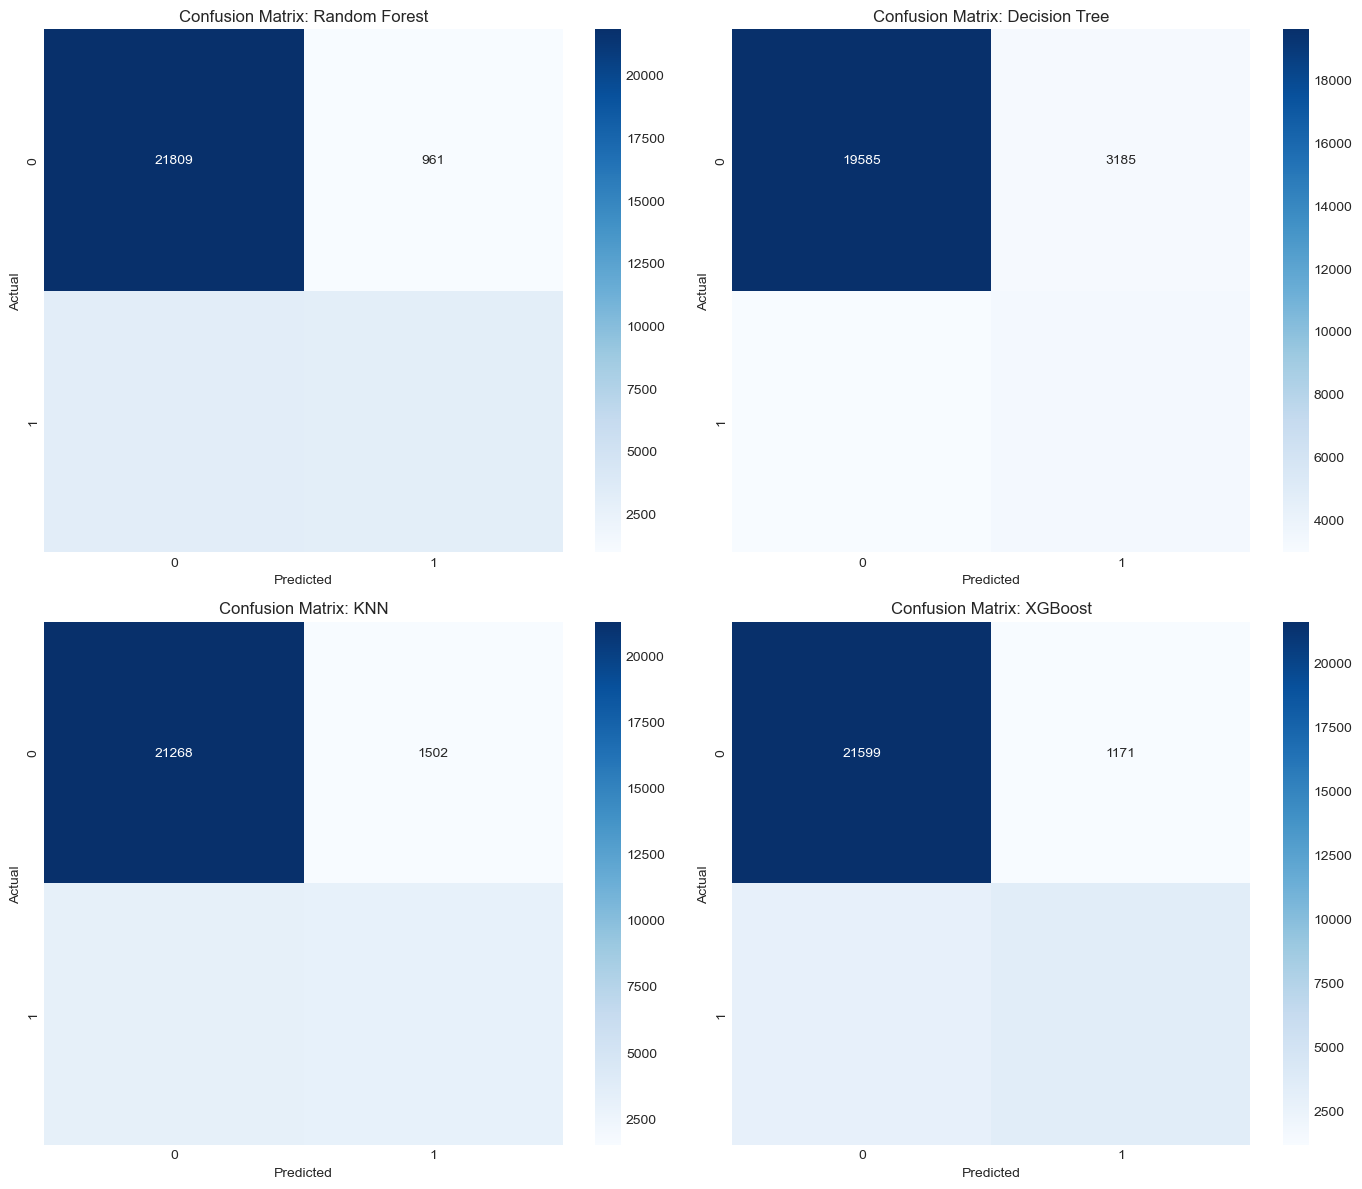

In [22]:
# Confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, name in enumerate(trained_models.keys()):
    cm = confusion_matrix(y_test, predictions[name]['test'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix: {name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

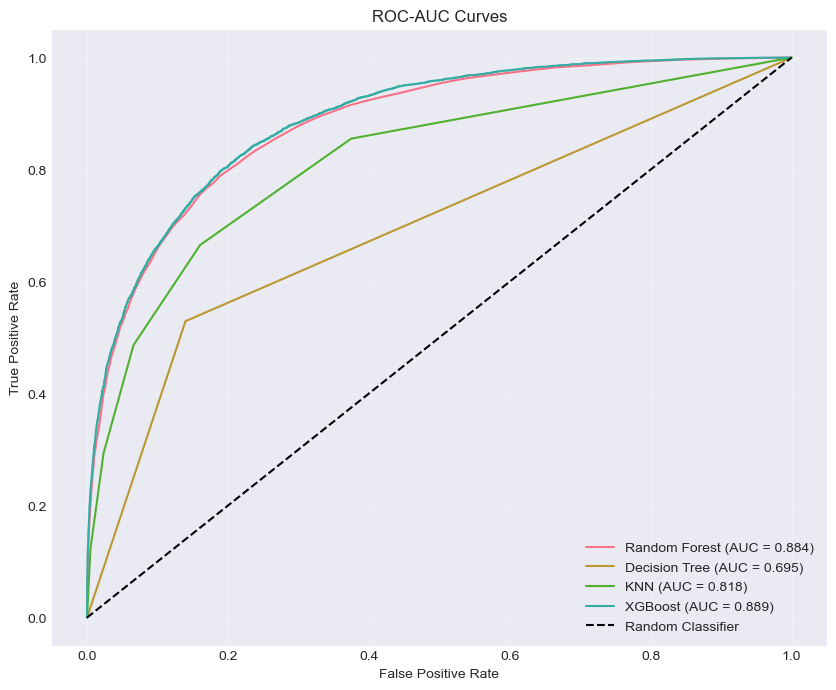

In [23]:
# ROC-AUC curves
plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('roc_auc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Model Serialization

In [24]:
# Save the best model
best_model = trained_models[best_model_name]

with open('Rainfall.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model ({best_model_name}) saved to Rainfall.pkl")
print("\nAll artifacts saved:")
print("  - Rainfall.pkl (trained model)")
print("  - scale.pkl (feature scaler)")
print("  - encoder.pkl (label encoders)")
print("  - imputer.pkl (missing value imputer)")
print("\nReady for production deployment!")

Best model (XGBoost) saved to Rainfall.pkl

All artifacts saved:
  - Rainfall.pkl (trained model)
  - scale.pkl (feature scaler)
  - encoder.pkl (label encoders)
  - imputer.pkl (missing value imputer)

Ready for production deployment!
